# Deep Dive into U-Net Architecture for Segmentation

This Jupyter Notebook is designed as a practical complement to the course "Deep Dive into U-Net Architecture for Segmentation." The course explores the theoretical foundations of U-Net, and this notebook demonstrates its practical application in the field of image segmentation.

To implement this tutorial, you need to first create a virtual environment and install the required packages specified in the `requirements.txt` file. This ensures a clean, reproducible environment for running the notebook. Once the virtual environment is set up, you can proceed with the tutorial.

The notebook is structured into five parts:
1. **Building U-Net Architecture**: Step-by-step implementation of the U-Net model, from input image to the output layer.
2. **Testing MaxPooling and ReLU**: Exploration of key operations such as MaxPooling and ReLU activation, with visualization.
3. **Testing Activation Functions**: Implementation and analysis of activation functions like Sigmoid and Softmax.
4. **Testing Metrics**: Evaluation of segmentation metrics including Dice Coefficient, IoU, and Pixel Accuracy.
5. **Implementing Loss Functions**: Implementation and comparison of different loss functions, such as Binary Cross-Entropy, Categorical Cross-Entropy, and Dice Loss.


At the end of the notebook, we have included a **sample script illustrating a complete semantic segmentation pipeline**. This script demonstrates how to implement the entire segmentation workflow, from data preprocessing and U-Net model building to training and evaluation, in an object-oriented manner. This additional section serves as a professional example to help users bridge the gap between theory and real-world application.

This notebook is an essential resource for anyone looking to master U-Net for segmentation tasks while adhering to best practices in machine learning and software engineering.


### Part 1: Building U-Net Architecture

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def unet(input_shape=(128, 128, 3)):
    inputs = layers.Input(input_shape)

    # Contracting Path (Encoder)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    # Bottleneck
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    # Expanding Path (Decoder)
    u1 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c3)
    u1 = layers.concatenate([u1, c2])
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u1)
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c4)

    u2 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c4)
    u2 = layers.concatenate([u2, c1])
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u2)
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c5)

    # Output Layer
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c5)

    model = Model(inputs, outputs)
    return model

model = unet()
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 128, 128,  │      1,792 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 128, 128,  │     36,928 │ conv2d_22[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 64, 64,    │          0 │ conv2d_23[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 64, 64,    │     73,856 │ max_pooling2d_7[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 64, 64,    │    147,584 │ conv2d_24[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 32, 32,    │          0 │ conv2d_25[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 32, 32,    │    295,168 │ max_pooling2d_8[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 32, 32,    │    590,080 │ conv2d_26[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_4  │ (None, 64, 64,    │    131,200 │ conv2d_27[0][0]   │
│ (Conv2DTranspose)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 64, 64,    │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 256)              │            │ conv2d_25[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 64, 64,    │    295,040 │ concatenate_4[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 64, 64,    │    147,584 │ conv2d_28[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_5  │ (None, 128, 128,  │     32,832 │ conv2d_29[0][0]   │
│ (Conv2DTranspose)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, 128, 128,  │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 128)              │            │ conv2d_23[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_30 (Conv2D)  │ (None, 128, 128,  │     73,792 │ concatenate_5[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_31 (Conv2D)  │ (None, 128, 128,  │     36,928 │ conv2d_30[0][0] 

 Total params: 1,862,849 (7.11 MB)

 Trainable params: 1,862,849 (7.11 MB)

 Non-trainable params: 0 (0.00 B)

### Part 2: Testing MaxPooling and ReLU

Original Shape: (1, 8, 8, 1)
Max Pooled Shape: (1, 4, 4, 1)
Ave Pooled Shape: (1, 4, 4, 1)


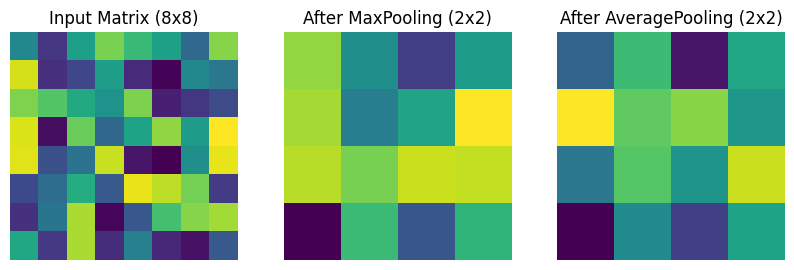

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D

# Test MaxPooling
sample_data = np.random.rand(1, 8, 8, 1)  # Random 8x8 data
max_pooling_layer = MaxPooling2D(pool_size=(2, 2))
ave_pooling_layer=AveragePooling2D(pool_size=(2, 2))

max_pooled_output = max_pooling_layer(sample_data)
ave_pooled_output = ave_pooling_layer(sample_data)

# Extract the data for visualization
input_matrix = sample_data[0, :, :, 0]  # Remove batch and channel dimensions
max_pooled_matrix = max_pooled_output[0, :, :, 0]  # Remove batch and channel dimensions
ave_pooled_matrix = ave_pooled_output[0, :, :, 0]  # Remove batch and channel dimensions

print("Original Shape:", sample_data.shape)
print("Max Pooled Shape:", max_pooled_output.shape)
print("Ave Pooled Shape:", ave_pooled_output.shape)

# Plot the matrices
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
axes[0].imshow(input_matrix, cmap='viridis')
axes[0].set_title("Input Matrix (8x8)")
axes[0].axis('off')

axes[1].imshow(max_pooled_matrix, cmap='viridis')
axes[1].set_title("After MaxPooling (2x2)")
axes[1].axis('off')

axes[2].imshow(ave_pooled_matrix, cmap='viridis')
axes[2].set_title("After AveragePooling (2x2)")
axes[2].axis('off')

plt.show()

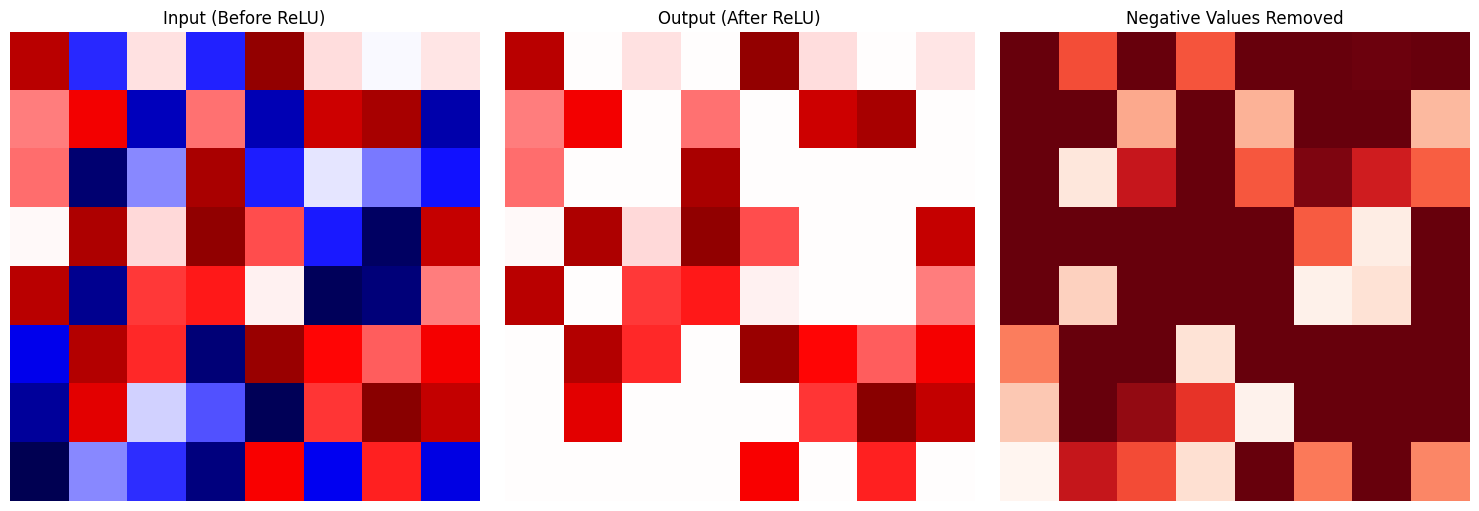

In [10]:
from tensorflow.keras.layers import ReLU

# Generate a random sample data matrix with both negative and positive values
sample_data = np.random.uniform(-1, 1, (1, 8, 8, 1))  # Random values between -1 and 1

# Apply ReLU activation
relu_layer = ReLU()
relu_output = relu_layer(sample_data)

# Extract data for visualization
input_matrix = sample_data[0, :, :, 0]  # Remove batch and channel dimensions
output_matrix = relu_output[0, :, :, 0]  # Remove batch and channel dimensions

# Create a clear visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Input matrix visualization
axes[0].imshow(input_matrix, cmap='seismic', vmin=-1, vmax=1)
axes[0].set_title("Input (Before ReLU)")
axes[0].axis('off')

# Output matrix visualization
axes[1].imshow(output_matrix, cmap='seismic', vmin=-1, vmax=1)
axes[1].set_title("Output (After ReLU)")
axes[1].axis('off')

# Difference visualization (Highlights negative values turned to 0)
difference = input_matrix - output_matrix
axes[2].imshow(difference, cmap='Reds')
axes[2].set_title("Negative Values Removed")
axes[2].axis('off')

plt.tight_layout()
plt.show()

### Part 3: Testing Activation Functions

In [11]:
from tensorflow.keras.activations import sigmoid, softmax

# Generate sample logits
logits = np.random.rand(1, 8, 8, 2)

# Test Sigmoid
sigmoid_output = sigmoid(logits)
print("Sigmoid Output Shape:", sigmoid_output.shape)

# Test Softmax
softmax_output = softmax(logits, axis=-1)
print("Softmax Output Shape:", softmax_output.shape)

Sigmoid Output Shape: (1, 8, 8, 2)
Softmax Output Shape: (1, 8, 8, 2)


### Part 4: Testing Metrics

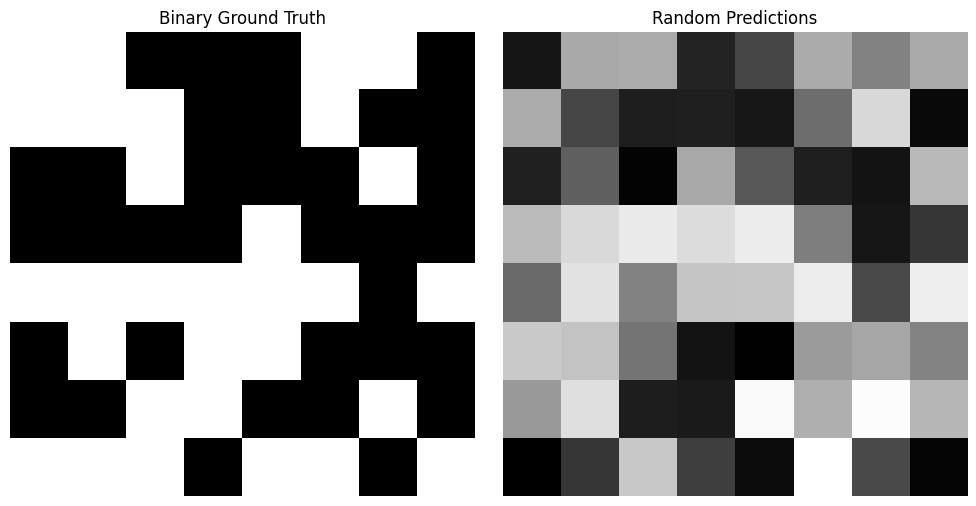

Dice Coefficient: 0.45636043
IoU Score: 0.29563922
Pixel Accuracy: 0.484375


In [12]:
def dice_coefficient(y_true, y_pred):
    smooth = 1e-6
    y_true_f = tf.keras.backend.flatten(tf.cast(y_true, tf.float32))  # Cast to float32
    y_pred_f = tf.keras.backend.flatten(tf.cast(y_pred, tf.float32))  # Cast to float32
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)

def iou_score(y_true, y_pred):
    y_true_f = tf.cast(y_true, tf.float32)  # Cast to float32
    y_pred_f = tf.cast(y_pred, tf.float32)  # Cast to float32
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    union = tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) - intersection
    return intersection / (union + 1e-6)

def pixel_accuracy(y_true, y_pred):
    y_true_f = tf.cast(y_true, tf.float32)  # Cast to float32
    y_pred_f = tf.cast(tf.round(y_pred), tf.float32)  # Cast to float32 and round
    correct = tf.reduce_sum(tf.cast(tf.equal(y_true_f, y_pred_f), tf.float32))
    total = tf.cast(tf.size(y_true_f), tf.float32)
    return correct / total

# Example usage with 8x8 matrices
true = np.random.randint(0, 2, (1, 8, 8, 1))  # Binary ground truth (8x8 matrix)
pred = np.random.rand(1, 8, 8, 1)  # Random predictions (8x8 matrix)

# Extract 2D matrices for visualization
true_matrix = true[0, :, :, 0]
pred_matrix = pred[0, :, :, 0]

# Display the ground truth and predictions
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(true_matrix, cmap='gray')
axes[0].set_title("Binary Ground Truth")
axes[0].axis('off')

axes[1].imshow(pred_matrix, cmap='gray')
axes[1].set_title("Random Predictions")
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Compute and display the loss values
print("Dice Coefficient:", dice_coefficient(true, pred).numpy())
print("IoU Score:", iou_score(true, pred).numpy())
print("Pixel Accuracy:", pixel_accuracy(true, pred).numpy())

### Part 5: Implementing Loss Functions

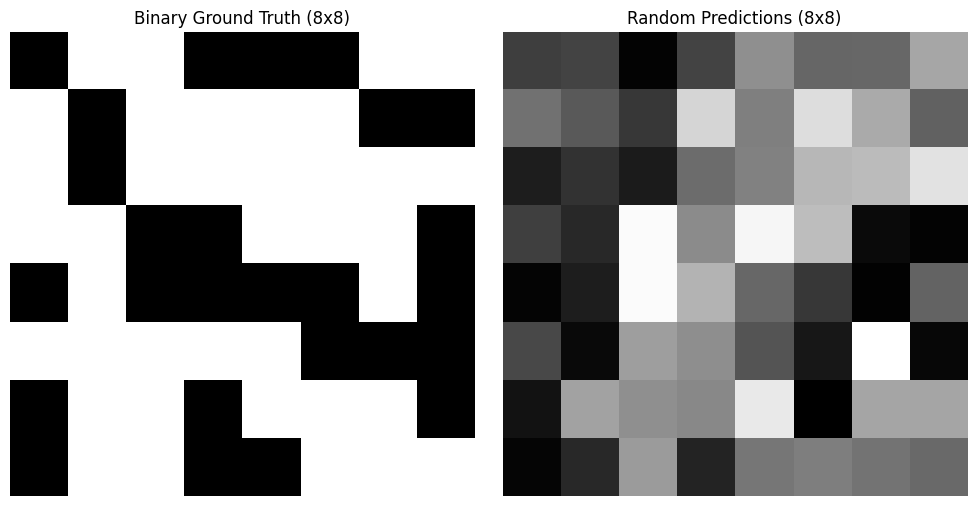

Binary Cross-Entropy: 0.9992774073733294
Categorical Cross-Entropy: 0.9992774073733294
Dice Loss: 0.47992867


In [13]:
def dice_coefficient(y_true, y_pred):
    smooth = 1e-6
    y_true_f = tf.keras.backend.flatten(tf.cast(y_true, tf.float32))  # Cast to float32
    y_pred_f = tf.keras.backend.flatten(tf.cast(y_pred, tf.float32))  # Cast to float32
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)

def binary_crossentropy(y_true, y_pred):
    return tf.reduce_mean(tf.keras.losses.binary_crossentropy(y_true, y_pred))

def categorical_crossentropy(y_true, y_pred):
    # Convert binary labels to one-hot encoding for categorical crossentropy
    y_true_one_hot = tf.one_hot(tf.cast(y_true, tf.int32), depth=2, axis=-1)  # depth=2 for two classes
    y_true_one_hot = tf.squeeze(y_true_one_hot, axis=-2)  # Remove the extra dimension if necessary
    return tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_true_one_hot, y_pred))

def dice_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)

# Generate 8x8 binary ground truth and random predictions
true = np.random.randint(0, 2, (1, 8, 8, 1))  # Binary ground truth (8x8)
pred = np.random.rand(1, 8, 8, 1)  # Random predictions (8x8)

# Convert predictions to match one-hot encoding format for categorical crossentropy
pred_one_hot = tf.concat([1 - pred, pred], axis=-1)  # Create two classes: [P(0), P(1)]

# Visualize the ground truth and predictions
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(true[0, :, :, 0], cmap='gray')
axes[0].set_title("Binary Ground Truth (8x8)")
axes[0].axis('off')

axes[1].imshow(pred[0, :, :, 0], cmap='gray')
axes[1].set_title("Random Predictions (8x8)")
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Display the computed loss values
print("Binary Cross-Entropy:", binary_crossentropy(true, pred).numpy())
print("Categorical Cross-Entropy:", categorical_crossentropy(true, pred_one_hot).numpy())
print("Dice Loss:", dice_loss(true, pred).numpy())


## Illustrating a Complete Semantic Segmentation Script

Following is a complete sample of a full script for semantic segmentation using the Oxford-IIIT Pets Dataset. The script is designed in an object-oriented manner, which is a professional approach in software development, ensuring modularity, reusability, and maintainability. It covers all steps of the pipeline, including data loading, preprocessing, model building, training, evaluation, and visualization of predictions.

For simplicity, this tutorial uses TensorFlow Datasets (TFDS), a library provided by TensorFlow that offers easy access to a wide range of preprocessed datasets with standardized APIs. TFDS eliminates the need for manual dataset preparation, making it ideal for quick prototyping and tutorials. However, note that downloading the dataset through TFDS might take some time, approximatively 3 mins. In real-world scenarios, professionals often handle custom datasets stored locally or fetched from specialized data repositories, requiring additional preprocessing steps tailored to the dataset's specific requirements.

The segmentation model in this script is built using a U-Net-like architecture, which combines encoding (downsampling) and decoding (upsampling) stages to learn both local and global features for precise pixel-wise segmentation. Custom metrics, such as the Dice coefficient, are included to evaluate the model's performance more comprehensively.

This script is not only an excellent introduction to semantic segmentation but also demonstrates how to organize code in a way that aligns with industry-standard practices. By following this object-oriented approach, students will learn how to create scalable and adaptable pipelines for various computer vision tasks.

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

# Define a class for the segmentation pipeline
class SegmentationPipeline:
    def __init__(self, dataset_name="oxford_iiit_pet", input_shape=(128, 128, 3), batch_size=32):
        self.dataset_name = dataset_name
        self.input_shape = input_shape
        self.batch_size = batch_size
        self.train_dataset = None
        self.val_dataset = None
        self.model = None

    # Load and preprocess the dataset
    def load_data(self):
        print("Loading dataset...")
        dataset, info = tfds.load(self.dataset_name, with_info=True, as_supervised=True)
        self.train_dataset = dataset["train"]
        self.val_dataset = dataset["test"]
        print(f"Dataset loaded: {info.description}")

    def preprocess(self, image, mask):
        image = tf.image.resize(image, self.input_shape[:2]) / 255.0  # Normalize image
        mask = tf.image.resize(mask, self.input_shape[:2])
        mask = tf.cast(mask > 0, tf.int32)  # Binarize the mask
        return image, mask

    def prepare_data(self):
        print("Preparing data...")
        self.train_dataset = (
            self.train_dataset
            .map(self.preprocess, num_parallel_calls=tf.data.AUTOTUNE)
            .shuffle(1000)
            .batch(self.batch_size)
            .prefetch(tf.data.AUTOTUNE)
        )
        self.val_dataset = (
            self.val_dataset
            .map(self.preprocess, num_parallel_calls=tf.data.AUTOTUNE)
            .batch(self.batch_size)
            .prefetch(tf.data.AUTOTUNE)
        )
        print("Data preparation complete.")

    # Build a simple U-Net model
    def build_model(self):
        print("Building model...")
        inputs = layers.Input(shape=self.input_shape)
        
        # Encoder
        x = layers.Conv2D(64, 3, activation="relu", padding="same")(inputs)
        x = layers.MaxPooling2D(2)(x)

        x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
        x = layers.MaxPooling2D(2)(x)

        x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
        x = layers.MaxPooling2D(2)(x)

        # Bottleneck
        x = layers.Conv2D(512, 3, activation="relu", padding="same")(x)

        # Decoder
        x = layers.Conv2DTranspose(256, 3, activation="relu", padding="same")(x)
        x = layers.UpSampling2D(2)(x)

        x = layers.Conv2DTranspose(128, 3, activation="relu", padding="same")(x)
        x = layers.UpSampling2D(2)(x)

        x = layers.Conv2DTranspose(64, 3, activation="relu", padding="same")(x)
        x = layers.UpSampling2D(2)(x)

        outputs = layers.Conv2D(1, 1, activation="sigmoid", padding="same")(x)

        self.model = models.Model(inputs, outputs)
        self.model.compile(
            optimizer="adam",
            loss="binary_crossentropy",
            metrics=["accuracy", self.dice_coefficient]
        )
        print("Model built.")
        plot_model(self.model, show_shapes=True)

    @staticmethod
    def dice_coefficient(y_true, y_pred):
        smooth = 1e-6
        y_true_f = tf.keras.backend.flatten(y_true)
        y_pred_f = tf.keras.backend.flatten(y_pred)
        intersection = tf.reduce_sum(y_true_f * y_pred_f)
        return (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)

    # Train the model
    def train(self, epochs=10):
        print("Training the model...")
        history = self.model.fit(
            self.train_dataset,
            validation_data=self.val_dataset,
            epochs=epochs
        )
        print("Training complete.")
        self.plot_history(history)

    # Evaluate the model
    def evaluate(self):
        print("Evaluating the model...")
        results = self.model.evaluate(self.val_dataset)
        print(f"Evaluation results: {results}")
        return results

    # Plot training history
    def plot_history(self, history):
        plt.figure(figsize=(12, 4))

        # Loss
        plt.subplot(1, 2, 1)
        plt.plot(history.history["loss"], label="Train Loss")
        plt.plot(history.history["val_loss"], label="Val Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.title("Loss")

        # Accuracy
        plt.subplot(1, 2, 2)
        plt.plot(history.history["accuracy"], label="Train Accuracy")
        plt.plot(history.history["val_accuracy"], label="Val Accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.title("Accuracy")

        plt.show()

    # Predict and visualize results
    def predict_and_visualize(self):
        print("Visualizing predictions...")
        for images, masks in self.val_dataset.take(1):
            preds = self.model.predict(images)
            preds = tf.cast(preds > 0.5, tf.int32)

            plt.figure(figsize=(10, 10))
            for i in range(3):  # Show first 3 examples
                plt.subplot(3, 3, i * 3 + 1)
                plt.imshow(images[i])
                plt.title("Input Image")
                plt.axis("off")

                plt.subplot(3, 3, i * 3 + 2)
                plt.imshow(tf.squeeze(masks[i]), cmap="gray")
                plt.title("Ground Truth")
                plt.axis("off")

                plt.subplot(3, 3, i * 3 + 3)
                plt.imshow(tf.squeeze(preds[i]), cmap="gray")
                plt.title("Prediction")
                plt.axis("off")

            plt.tight_layout()
            plt.show()

# Main execution
if __name__ == "__main__":
    pipeline = SegmentationPipeline()
    pipeline.load_data()
    pipeline.prepare_data()
    pipeline.build_model()
    pipeline.train(epochs=10)
    pipeline.evaluate()
    pipeline.predict_and_visualize()


Loading dataset...


d:\My_github\Cours_IA\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|██████████| 2/2 [00:00<00:00, 26.87 url/s]
Extraction completed...: 0 file [00:00, ? file/s]
Dl Completed...: 100%|██████████| 2/2 [00:00<00:00, 24.24 url/s]


Dataset oxford_iiit_pet downloaded and prepared to C:\Users\carte\tensorflow_datasets\oxford_iiit_pet\4.0.0. Subsequent calls will reuse this data.
Dataset loaded: The Oxford-IIIT pet dataset is a 37 category pet image dataset with roughly 200
images for each class. The images have large variations in scale, pose and
lighting. All images have an associated ground truth annotation of breed and
species. Additionally, head bounding boxes are provided for the training split,
allowing using this dataset for simple object detection tasks. In the test
split, the bounding boxes are empty.
Preparing data...


ValueError: in user code:

    File "C:\Users\carte\AppData\Local\Temp\ipykernel_18460\3645934805.py", line 28, in preprocess  *
        mask = tf.image.resize(mask, self.input_shape[:2])

    ValueError: 'images' must have either 3 or 4 dimensions.


In [15]:
pipeline.val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>